In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from backtest import backtest_rebalance, backtest_dca

In [2]:
start = "2023-01-01"
end = "2026-01-01"

# symbols = {
#     "ETH": "ETH-USD",
#     "DOT": "DOT-USD",
#     "ADA": "ADA-USD",
#     "SOL": "SOL-USD",
#     "LINK": "LINK-USD",
#     "BTC": "BTC-USD",
#     "ATOM": "ATOM-USD",
#     "AVAX": "AVAX-USD",
# }

symbols = {
    "BTC": "BTC-USD",
    "ETH": "ETH-USD",
    "BNB": "BNB-USD",
    "XRP": "XRP-USD",
    "SOL": "SOL-USD",
    "TRON": "TRX-USD",
    "ADA": "ADA-USD",
    "XMR": "XMR-USD",
}

initial_capital = 1.0
target_weights = None
threshold = 0.05
fee = 0.001   

In [3]:
# df = pd.DataFrame()
# for k, v in symbols.items():
#     df[k] = yf.download(v, start=start, end=end)["Close"]

# df.to_csv("prices.csv")

In [4]:
df_origin = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR
Date,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738
...,...,...,...,...,...,...,...,...
2025-12-27,87802.156250,2947.998291,844.554504,1.872853,124.647713,0.284630,0.369542,453.496796
2025-12-28,87835.835938,2948.568115,858.828796,1.864360,125.199356,0.284914,0.368502,453.068542
2025-12-29,87138.140625,2934.538330,851.187561,1.847724,123.125229,0.284616,0.352915,437.445709


In [5]:
df = df_origin[['SOL', 'DOT', 'ETH', 'ADA']].copy()
df = df[df.index >= '2025-01-01']

KeyError: "['DOT'] not in index"

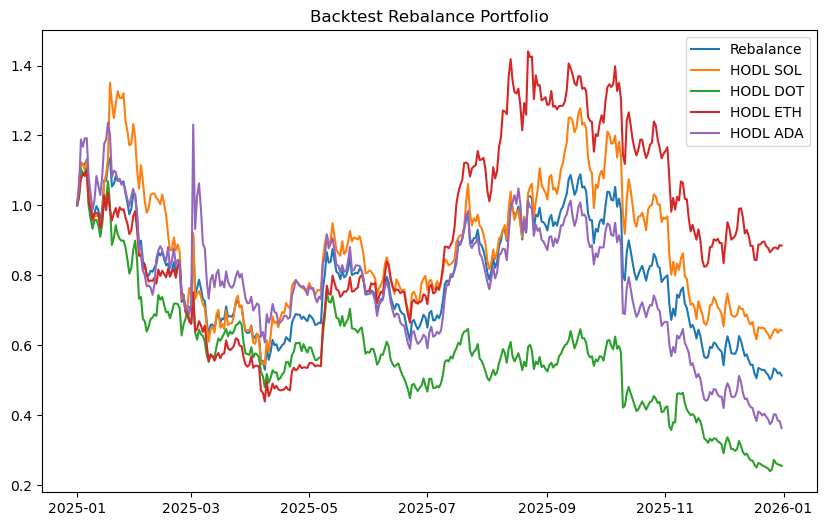

In [ ]:
result, metrics = backtest_rebalance(df, target_weights=target_weights, initial_capital=initial_capital, threshold=threshold, fee=fee)

In [ ]:
metrics

{'Rebalance_final': 0.5131685580792696,
 'Rebalance_MDD': -0.5577671217960468,
 'Num_rebalances': 6,
 'HODL_SOL_final': 0.6420904177799129,
 'HODL_SOL_MDD': -0.5970814063900631,
 'HODL_DOT_final': 0.25456896062773315,
 'HODL_DOT_MDD': -0.7833822346649968,
 'HODL_ETH_final': 0.8847573954278964,
 'HODL_ETH_MDD': -0.6007838805465938,
 'HODL_ADA_final': 0.3627211394823873,
 'HODL_ADA_MDD': -0.7067892006515795}

/Users/aleksejkitajskij/Desktop/rebalance/backtest.py:222: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  invested_plot = result["Invested"].resample("M").last()


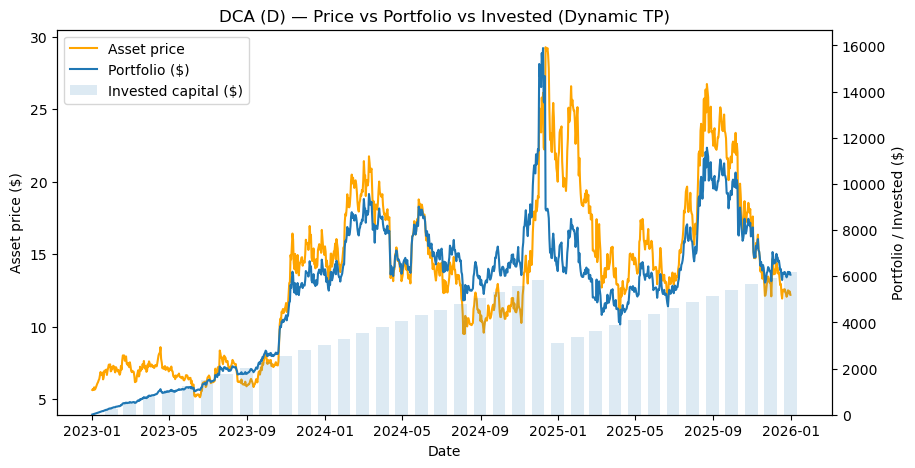

{'Total_invested': 9133.333333333283,
 'Final_value': 6067.499892813515,
 'Realized_profit': 5942.09147556218,
 'Num_rebalances': 1}

In [ ]:
sol_prices = df_origin["LINK"]
invest_sum = 250 / 30

dca_result, dca_metrics = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="D",
    available_sum=10000,
    profit_multiple=3,
    fee=0.001,
    plot=True
)

dca_metrics

In [ ]:
results = {}

for symbol in symbols.keys():
    prices = df_origin[symbol]
    invest_sum = 250 / 30

    dca_result, dca_metrics = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="D",
        available_sum=10000,
        profit_multiple=3,
        fee=0.001,
        plot=False
    )

    results[symbol] = dca_metrics

In [ ]:
res = pd.DataFrame(results).T

In [ ]:
res['Total'] = res['Final_value'] + res['Realized_profit']
res['Profit'] = res['Total'] - res['Total_invested']
res.sort_values('Profit', ascending=False)

,Total_invested,Final_value,Realized_profit,Num_rebalances,Total,Profit
BTC,9133.333333,16472.350138,0.000000,0.0,16472.350138,7339.016805
SOL,9133.333333,5551.120022,10224.358834,3.0,15775.478857,6642.145523
LINK,9133.333333,6067.499893,5942.091476,1.0,12009.591368,2876.258035
ETH,9133.333333,11362.315498,0.000000,0.0,11362.315498,2228.982164
ADA,9133.333333,4173.001628,5983.318330,1.0,10156.319958,1022.986625
AVAX,9133.333333,4291.904059,2941.152661,1.0,7233.056720,-1900.276614
DOT,9133.333333,3423.128813,0.000000,0.0,3423.128813,-5710.204520
ATOM,9133.333333,2990.921176,0.000000,0.0,2990.921176,-6142.412157
